In [63]:
import json
import pandas as pd

from NewsBiasClustering import NewsBiasClusteringFromMetrics

In [64]:
print('Loading File')
file = open('rust-articles-backup-metrics.json', encoding='utf8')
articles = pd.DataFrame.from_dict(json.load(file))
print('File Loaded')

Loading File
File Loaded


Counter({2: 50954, 4: 44384, 1: 28370, 0: 27889, 3: 9628})


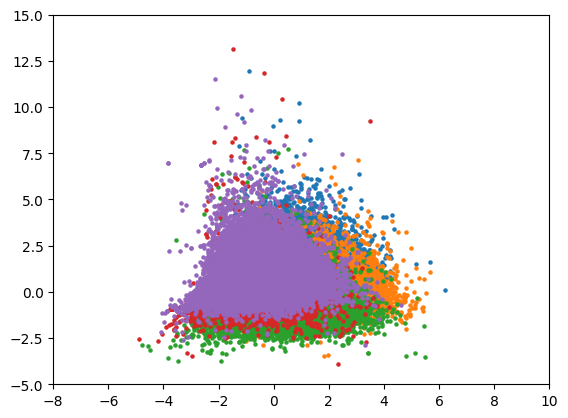

In [65]:
metrics = []
for i in range(len(articles)):
    sentiment = articles.iloc[i]['sentiment']
    quoteBased = articles.iloc[i]['quoteBased']
    sensationalized = articles.iloc[i]['sensationalized']
    mudslinging = articles.iloc[i]['mudslinging']
    spin = articles.iloc[i]['spin']
    informal = articles.iloc[i]['informal']
    metrics.append([sentiment, quoteBased, sensationalized, mudslinging, spin, informal])
labels = NewsBiasClusteringFromMetrics(metrics, threshold=0.32)

In [66]:
l1 = 0
l2 = 1
c1 = 0
c2 = 0
clusters = []
for j in range(len(set(labels))):
    count = 0
    for i in range(len(articles)):
        if labels[i] == j and count < 20:
            clusters.append([j,articles.iloc[i]['body']])
            count += 1
clusters = pd.DataFrame(clusters,columns=['label', 'body'])
"""clusters.to_json('testing-clusters.json')
print('Loading File')
file = open('testing-clusters.json', encoding='utf8')
clusters = pd.DataFrame.from_dict(json.load(file))
print('File Loaded')"""
clusters


,label,body
0,0,"More than 100 migrants, including seven childr..."
1,0,Thirteen French soldiers fighting Islamist ins...
2,0,"More than £80,000 has been raised to help a Br..."
3,0,"At least 20 people have been hurt in a ""seriou..."
4,0,A 20mph speed limit has come into force on roa...
...,...,...
95,4,The brain of a man killed in the eruption of M...
96,4,A teenager has pleaded guilty to the manslaugh...
97,4,A suspected arsonist who suffered life-threate...
98,4,Home Secretary Priti Patel has sent an extradi...


In [67]:
for i in clusters[(clusters['label'] == 0) | (clusters['label'] == 1)]['body']:
    print(i)
    print('\n\n\n')

More than 100 migrants, including seven children, have been intercepted in the English Channel - the highest number in one day.
Five inflatable boats were stopped by Border Force, the Home Office said.
The vessels contained 102 people, nine of whom managed to get to a beach in Kent before being held by police.
They are believed to be from Iran, Iraq, Afghanistan, Pakistan and Syria.
French authorities said they had detained "around 30 people".
Dover & Deal MP Natalie Elphicke hit out at "serious security lapses" and said it "beggars belief that another flotilla of small boats got past the French again today".
It is the second day in a row to produce a record high after 90 migrants were intercepted on Thursday.
There were six incidents on Friday, spanning a time period between 1am and 10.45am.
Those that reached the shore were held at Sandgate Beach by Kent Police, while the boats stopped by Border Force contained varying numbers of people.
Ms Elphicke called for an "urgent explanation 

In [68]:
clusters[clusters['label'] == 3]

,label,body
60,3,At least 11 people have died after drinking co...
61,3,"A 310-year-old violin worth £250,000 which was..."
62,3,"Tesco plans to cut more than 1,800 jobs as par..."
63,3,
64,3,Border Force officials have intercepted four b...
65,3,More than a billion Android smartphones are at...
66,3,Ed Sheeran's manager has told a court how he d...
67,3,The end of 18 years of war in Afghanistan coul...
68,3,Two airline groups have revealed they expect t...
69,3,Andrew Yang has dropped out of the race to bec...
